[*********************100%***********************]  8 of 8 completed
          AAPL      AMZN      BABA        FB      GOOG      MSFT      NVDA  \
AAPL  0.114166  0.033068  0.050809  0.032459  0.012144  0.012209  0.048890   
AMZN  0.033068  0.061756  0.040849  0.048943  0.037929  0.029621  0.032809   
BABA  0.050809  0.040849  0.121536  0.037273  0.019067  0.021308  0.059154   
FB    0.032459  0.048943  0.037273  0.178742  0.063030  0.052393  0.008145   
GOOG  0.012144  0.037929  0.019067  0.063030  0.049471  0.035393  0.023976   
MSFT  0.012209  0.029621  0.021308  0.052393  0.035393  0.060519  0.029674   
NVDA  0.048890  0.032809  0.059154  0.008145  0.023976  0.029674  0.148767   
PYPL  0.024764  0.035785  0.040851  0.036974  0.027250  0.041638  0.043661   

          PYPL  
AAPL  0.024764  
AMZN  0.035785  
BABA  0.040851  
FB    0.036974  
GOOG  0.027250  
MSFT  0.041638  
NVDA  0.043661  
PYPL  0.067781  


C:\Users\Vannesa Nyathi\anaconda3\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\Vannesa Nyathi\anaconda3\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\Vannesa Nyathi\anaconda3\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\Vannesa Nyathi\anaconda3\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\Vannesa Nyathi\anaconda3\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
C:\Users\Vannesa Nyathi\anaconda3\l

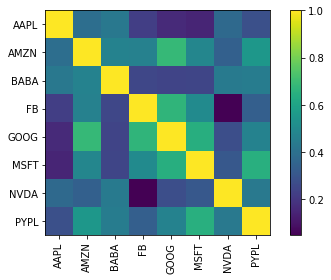

In [1]:
import pypfopt
pypfopt.__version__
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns,plotting
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
#from mlfinlab.portfolio_optimization.cla import CriticalLineAlgorithm


from datetime import datetime, timedelta
import yfinance as yf
yf.pdr_override()
import pandas as pd
import numpy as np
from pylab import mpl, plt
import matplotlib.pyplot as plt
import seaborn
import mpld3
mpld3.enable_notebook()

#This functions takes a date and a positive/negative integer that allows to 
#use substractions with months
#Example: monthdelta(20th may 2013,-1)=
def monthdelta(date, delta):
    m, y = (date.month+delta) % 12, date.year + ((date.month)+delta-1) // 12
    if not m: m = 12
    d = min(date.day, [31,
        29 if y%4==0 and (not y%100==0 or y%400 == 0) else 28,
        31,30,31,30,31,31,30,31,30,31][m-1])
    return date.replace(day=d,month=m, year=y)

END_DATE = datetime.today() - timedelta(days = 1) #END_DATE is set to yesterday

data_opt = yf.download("AAPL AMZN FB MSFT GOOG BABA NVDA PYPL ", monthdelta(END_DATE,-3), monthdelta(END_DATE,-2))
data_opt = data_opt["Adj Close"]
S = risk_models.sample_cov(data_opt)
print(S)
plotting.plot_covariance(S, plot_correlation=True);

C:\Users\Vannesa Nyathi\anaconda3\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)


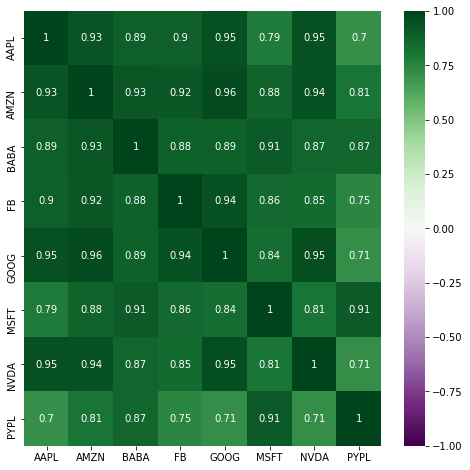

In [2]:

plt.figure(figsize=(8,8))
seaborn.heatmap(data_opt.corr(), annot=True, cmap='PRGn', vmin=-1, vmax=1)

[*********************100%***********************]  8 of 8 completed
              BA    MGAM.L     PHE.L     RLE.L       SPI    TALK.L      UU.L  \
BA      1.000000  0.498909 -0.065381 -0.290691 -0.013180  0.415424 -0.009771   
MGAM.L  0.498909  1.000000  0.240196 -0.223583  0.230409  0.806233  0.253776   
PHE.L  -0.065381  0.240196  1.000000  0.682853  0.838674  0.436172  0.818921   
RLE.L  -0.290691 -0.223583  0.682853  1.000000  0.768483  0.068461  0.692421   
SPI    -0.013180  0.230409  0.838674  0.768483  1.000000  0.592332  0.764040   
TALK.L  0.415424  0.806233  0.436172  0.068461  0.592332  1.000000  0.384226   
UU.L   -0.009771  0.253776  0.818921  0.692421  0.764040  0.384226  1.000000   
XSG.F  -0.367217 -0.702337  0.274595  0.584494  0.275575 -0.391209  0.118020   

           XSG.F  
BA     -0.367217  
MGAM.L -0.702337  
PHE.L   0.274595  
RLE.L   0.584494  
SPI     0.275575  
TALK.L -0.391209  
UU.L    0.118020  
XSG.F   1.000000  


C:\Users\Vannesa Nyathi\anaconda3\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)


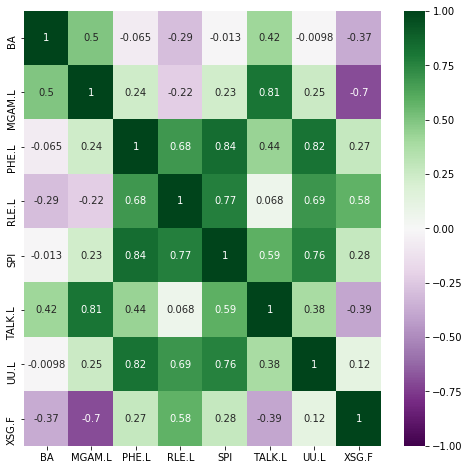

In [3]:
"""
COMPANIES FROM THE FOLLOWING SECTORS:
Energy, Materials, Industrials(BAEsystems), Healthcare, Tech, telecommunications, Utilities, Real Estate
(All on the london stock exchange)
"""
data_opt2 = yf.download("PHE.L MGAM.L BA SPI XSG.F TALK.L UU.L RLE.L ", monthdelta(END_DATE,-3), monthdelta(END_DATE,-2))
data_opt2 = data_opt2["Adj Close"]
S2 = data_opt2.corr()
plt.figure(figsize=(8,8))
seaborn.heatmap(S2, annot=True, cmap='PRGn', vmin=-1, vmax=1)
print(S2)

[*********************100%***********************]  6 of 6 completed
            0P00006OK2.F  0P0000P1BG.F    EXSA.MI         LQD         SPY  \
Date                                                                        
2020-08-03     25.792000     23.629000  36.110001  137.346954  327.479126   
2020-08-04     25.889999     23.667000  36.025002  137.853638  328.744049   
2020-08-05     25.813000     23.632000  36.230000  137.664871  330.785858   
2020-08-06     25.881001     23.665001  35.994999  138.251068  332.997009   
2020-08-07     25.865999     23.650000  36.055000  137.863571  333.236084   
2020-08-10     25.903999     23.681000  36.165001  137.565521  334.232086   
2020-08-11     25.819000     23.649000  36.794998  136.701141  331.473114   
2020-08-12     25.778000     23.635000  37.224998  136.363342  336.094635   
2020-08-13     25.665001     23.600000  37.080002  135.131332  335.487030   
2020-08-14     25.687000     23.607000  36.590000  134.535217  335.497009   
2020-08

C:\Users\Vannesa Nyathi\anaconda3\lib\site-packages\mpld3\_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)


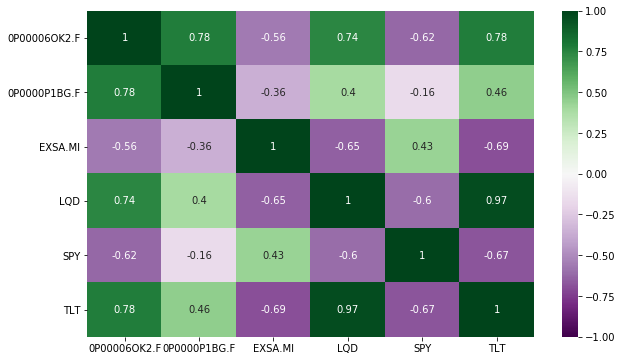

In [26]:
"""
Different types of assets from the USA and Europe: ETF(S&P 500, STOXX Europe 600),
Government Bonds(iShares Treasury Bond, iShares Euro Government Bond Index Fund),
Corporate Bonds(iShares iBoxx corporate bond, iShares Euro Credit Bond Index Fund ).
"""
data_opt3 = yf.download("SPY EXSA.MI TLT 0P00006OK2.F LQD 0P0000P1BG.F ", monthdelta(END_DATE,-3), monthdelta(END_DATE,-2))
data_opt3 = data_opt3["Adj Close"]
S3 = data_opt3.corr()
plt.figure(figsize=(10,6))
seaborn.heatmap(S3, annot=True, cmap='PRGn', vmin=-1, vmax=1)
print(data_opt3)
